# Original notebook used in Lochner et al. 2022
This is now more or less redundant since we are working from the MAF metrics bundle.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_metrics
import plot_tools
from importlib import reload
import os


%matplotlib widget

In [25]:
output_dir = 'paper_plots_output/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [46]:
plot_type = 'paper'

latex_dpi = 72.27
textwidth = 469.75502/latex_dpi
textheight = 650.43001/latex_dpi

figsize_square = (textwidth/2, textwidth/2)
figsize_full = (textwidth, textheight*0.8)
figsize_column = (10, 15)


save_plot = True

if plot_type == 'paper':
    plt.rcParams.update({'font.family':'serif', 'font.size':8, 'figure.dpi':latex_dpi, #meaningless for pdf only screen
                         'text.usetex':True,
                        'savefig.format':'pdf', 'figure.figsize':figsize_column})
    fig_dir = os.path.join(output_dir, 'bar_graphs')

elif plot_type == 'presentation':
    fig_dir = os.path.join(output_dir, 'bar_graphs')
    plt.rcParams.update({'font.family':'sans-serif', 'font.size':10, 'figure.dpi':300, 'text.usetex':False,
                    'savefig.format':'png'})
    
else:
    fig_dir = ''
    plt.rcParams.update({'font.family':'sans-serif', 'font.size':10, 'figure.dpi':100, 'text.usetex':True,
                    'savefig.format':'png'})
    save_plot = False
    
if fig_dir != '' and not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [47]:
# Photo-z impact

# metrics = pd.read_csv('metrics_v1_4.csv', index_col=0)

# metrics_to_drop = ['kn_GW170817_error', 
#                        'kn_Pop_kNe_error',
#                        'sl_td_all_bands_distance_precision',
#                        'sl_std_num_lensed_SNe_Ia_in_specific_galaxy_clusters ']

# runs_to_drop = ['testrolling', 'stuck_rolling', 'weather']

# metrics = metrics.drop(metrics_to_drop, axis=1)

# for i in metrics.index:
#     for r in runs_to_drop:
#         if r in i:
#             metrics = metrics.drop(i, axis=0)
# metrics = metrics.dropna(axis=1)
# metrics = metrics.drop(['DISPLAY_NAME'])
# baseline = 'baseline_v1.4_10yrs.db'

# metrics_rel = metrics.copy()
# for c in metrics_rel.columns[1:]:
#     if 'pz' in c:
#         metrics_rel[c] = metrics_rel[c].astype('float')
#         metrics_rel[c] = (metrics_rel[c] - metrics_rel.loc[baseline,c])/metrics_rel.loc[baseline,c]
#         print(c, metrics[c].min(), metrics[c].max())
#         print(c, metrics_rel[c].min(), metrics_rel[c].max())
#         print()

In [48]:
sim_version = '1.5'
if sim_version == '1.4':
    fl = 'metrics_v1_4.csv'
else:
    fl = 'metrics_v1_5.csv'

In [49]:
reload(read_metrics)

<module 'read_metrics' from '/home/michelle/Project/OSTF/ObsStrat/code/metricsPaperPlots/read_metrics.py'>

In [50]:
metrics_rel, metrics_display_names, baseline_values = read_metrics.read_metrics(fl, dropna=False)
probes_metrics = read_metrics.get_metrics_by_probe(metrics_rel)
ylabel = read_metrics.ylabel

In [51]:
metrics_rel.columns

Index(['kn_GW170817_counts', 'kn_Maf_Mean_Counts', 'kn_Pop_kNe_counts',
       'static_median Y1 $i$-band coadded depth in effective survey area',
       'static_median Y10 $i$-band coadded depth in effective survey area',
       'static_stddev of Y1 $i$-band coadded depth in effective survey area',
       'static_stddev of Y10 $i$-band coadded depth in effective survey area',
       'static_Y1 effective survey area', 'static_Y10 effective survey area',
       'lss_diagnostic FOM Y1', 'lss_diagnostic FOM Y10',
       'lss_Y1 Ngal (0.66<z<1.0)', 'lss_Y10 Ngal (0.66<z<1.0)',
       'cumulative_season_length_[yr]',
       'median_inter_night_gap_all_filters_[d]',
       'sl_num_lensed_SNe_Ia_with_good_time_delays_lensed_by_galaxies',
       'sl_num_lensed_quasars_with_good_time_delays',
       'sl_num_lensed_SNe_Ia_in_specific_galaxy_clusters', 'sn_faint_nsn_tot',
       'sn_faint_zmax', 'sn_normal_nsn_tot', 'sn_faint_snr_rate',
       'sn_faint_zlim_r', 'sn_normal_zmax', 'wl_fom', 'wl_sy

In [52]:
bar_graphs = 'vertical'

In [53]:
# plt.rcParams['font.size'] = 12

In [54]:
reload(plot_tools)

<module 'plot_tools' from '/home/michelle/Project/OSTF/ObsStrat/code/metricsPaperPlots/plot_tools.py'>

In [55]:
def convert_sim_names(names):
    new_names = []
    
    for n in names:
        s = n[:-3]
        s = s.replace('v1.4', 'v1.5')
        if '2snaps' in s:
            s = 'baseline_2snaps_v1.5_10yrs'
        new_names.append(s)
    return new_names

In [56]:
def write_lookup_table(descriptions):
    fl = open(os.path.join(output_dir, 'sims_short.tbl'), 'w')
    fl.write('Simulation name & Short name & Longer description \\\\ \n')
    fl.write('\hline \n')
    for i in descriptions.index:
        sim_name = i
        sim_name = sim_name.replace('_', '\_')
        if '1.4' in sim_name:
            sim_name = sim_name.replace('1.4', '1.5')
        sim_name = '\\texttt{%s}' %sim_name
        fl.write('%s & %s & %s \\\\ \n' %(sim_name, descriptions.loc[i, 'short'], descriptions.loc[i, 'long']))
    fl.write('\hline')

## Making the plots

In [57]:
reload(plot_tools)

<module 'plot_tools' from '/home/michelle/Project/OSTF/ObsStrat/code/metricsPaperPlots/plot_tools.py'>

In [58]:
# df1 = pd.read_csv('backup_2021_12_01/metrics_v1_5.csv', index_col=0)
# df2 = pd.read_csv('metrics_v1_5.csv', index_col=0)
# df1 = df1.drop(columns=['Problematic'])
# df2 = df2.drop(columns=['Problematic'])
# (df1-df2).sum()
# df1.columns==df2.columns

In [59]:
# metrics_rel.index

static
lss
wl
sl
sn
kn
pz


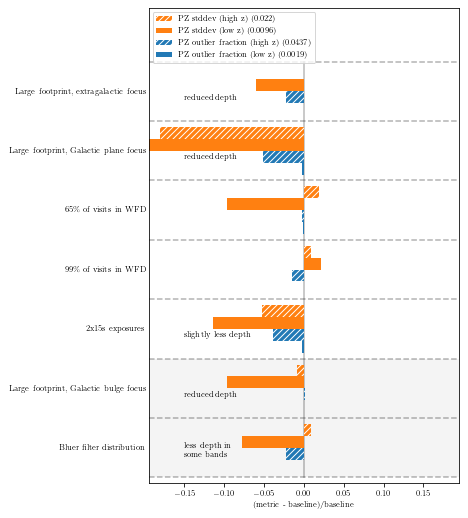

In [62]:
descriptions = pd.read_excel('bar_graph_data.xlsx', sheet_name='descriptions', index_col=0)

write_lookup_table(descriptions)

new_lims = {'lss': [1, 1.05],  'sn':[1,1.12], 'pz':[1,1.04], 'static':[1, 1.1]}
new_xlims = {'wl':[1.05,1]}

if sim_version == '1.5':
    new_index_desc = convert_sim_names(descriptions.index)
    descriptions.index = new_index_desc

all_sims = False
for k in probes_metrics.keys():
# for k in ['wl']:
    print(k)
    if k != 'detf':
        metric = k
        this_df = probes_metrics[metric]
        
        
#         if metric == 'static':
#             this_df['detf_fom'] = probes_metrics['detf']['detf_fom']
        
        if all_sims:
            sheet_name = 'all'
            fldr = os.path.join(output_dir, 'bar_graphs_all')
        else:
            sheet_name = metric
            fldr = os.path.join(output_dir, 'bar_graphs')
        if not os.path.exists(fldr):
            os.makedirs(fldr)
        plot_data = pd.read_excel('bar_graph_data.xlsx', sheet_name=sheet_name, index_col=0)
        plot_data = plot_data.fillna('')

        if sim_version == '1.5':
            new_index = convert_sim_names(plot_data.index)
            plot_data.index = new_index
            
            
            

#         for i in plot_data.index:
#             if i not in this_df.index:
#                 print(i)
        shaded_pairs = False # Shades each metric in a pair (designed for Y1 vs. Y10)
        this_df = this_df.loc[plot_data.index[::-1]]
        if k == 'static':
            new_cols = ['static_median Y1 $i$-band coadded depth in effective survey area',
                        'static_median Y10 $i$-band coadded depth in effective survey area',
                        'static_stddev of Y1 $i$-band coadded depth in effective survey area',
                        'static_stddev of Y10 $i$-band coadded depth in effective survey area',
                        'static_Y1 effective survey area', 
                        'static_Y10 effective survey area']
            shaded_pairs = True
        if k == 'pz':
            new_cols = ['pz_y10_zhigh_stdd', 'pz_y10_zlow_stdd', 'pz_y10_zhigh_fout', 'pz_y10_zlow_fout']
            shaded_pairs = True
        if k == 'wl':
            new_cols = this_df.columns[::-1]
        if k == 'lss':
            new_cols = ['lss_Y1 Ngal (0.66<z<1.0)', 'lss_Y10 Ngal (0.66<z<1.0)',
                        'lss_diagnostic FOM Y1', 'lss_diagnostic FOM Y10']
            shaded_pairs = True
        if k == 'sn':

            new_cols = ['sn_faint_zmax',
                        'sn_normal_zmax',
                        'sn_faint_nsn_tot', 
                        'sn_normal_nsn_tot',
                        'sn_faint_snr_rate',
                        'sn_faint_zlim_r',
                        'sn_Ia_peculiar_velocity']
        if k == 'sl':
            new_cols = ['sl_num_lensed_SNe_Ia_with_good_time_delays_lensed_by_galaxies',
                        'sl_num_lensed_SNe_Ia_in_specific_galaxy_clusters',
                        'sl_num_lensed_quasars_with_good_time_delays']
        if k == 'kn':
            new_cols = this_df.columns

        this_df = this_df[new_cols[::-1]]
        
        lims = [1,1]
        xlims = [1,1]
        
        if k in new_lims.keys():
            lims = new_lims[k]
        if k in new_xlims.keys():
            xlims = new_xlims[k]
        plot_tools.make_bar_graph(this_df, metrics_display_names, ylabel=ylabel,
                                  fname=fldr+'/%s_selected_strategies' %metric,
                                 descriptions=descriptions, plot_data=plot_data,
                                 baseline_values=baseline_values,
                                 legend_location='upper left', plot_type=plot_type,
                                 figsize=figsize_full, expand_ylim_by=lims,
                                 expand_xlim_by=xlims,
                                 include_colour_bands=True,
                                 include_baseline_values=True,
                                 shaded_pairs=shaded_pairs)

## Making a bar graph for the u-band stuff

In [63]:
reload(read_metrics)

<module 'read_metrics' from '/home/michelle/Project/OSTF/ObsStrat/code/metricsPaperPlots/read_metrics.py'>

In [65]:
metrics_rel, metrics_display_name, baseline_values=read_metrics.read_metrics('metrics_outstanding.csv', baseline='baseline_nexp2_v1.7_10yrs.db',dropna=False)


In [66]:
cols = ['kn_Pop_kNe_counts', 'sl_num_lensed_SNe_Ia_with_good_time_delays_lensed_by_galaxies',
       'sn_normal_nsn_tot', 'pz_y10_zlow_stdd','wl_fom','wl_systematics']

In [67]:
metrics_rel.loc['u_long_ms_50_v1.7_10yrs.db', cols]

kn_Pop_kNe_counts                                                0.471429
sl_num_lensed_SNe_Ia_with_good_time_delays_lensed_by_galaxies         NaN
sn_normal_nsn_tot                                               -0.036380
pz_y10_zlow_stdd                                                 0.040400
wl_fom                                                          -0.022033
wl_systematics                                                  -0.014555
Name: u_long_ms_50_v1.7_10yrs.db, dtype: float64

## Comparing v1.4 and v1.5 numerically

In [68]:
metrics5 = pd.read_csv('metrics_v1_5.csv', index_col=0)
metrics4 = pd.read_csv('metrics_v1_4.csv', index_col=0)

if 'group' in metrics4.columns:
    metrics4 = metrics4.drop('group', axis=1)
if 'group' in metrics5.columns:
    metrics5 = metrics5.drop('group', axis=1)
if 'Problematic' in metrics5.columns:
        obsolete_runs = metrics5.index[~metrics5.Problematic.isna().values]
        metrics5 = metrics5.drop('Problematic', axis=1)
        metrics5 = metrics5.drop(obsolete_runs)
metrics5 = metrics5[1:]

In [69]:
metrics5

,kn_GW170817_counts,kn_GW170817_error,kn_Maf_Mean_Counts,kn_Pop_kNe_counts,kn_Pop_kNe_error,static_median Y1 $i$-band coadded depth in effective survey area,static_median Y3 $i$-band coadded depth in effective survey area,static_median Y6 $i$-band coadded depth in effective survey area,static_median Y10 $i$-band coadded depth in effective survey area,static_stddev of Y1 $i$-band coadded depth in effective survey area,...,sn_normal_zmax,wl_fom,wl_systematics,pz_y10_zlow_fout,pz_y10_zlow_stdd,pz_y10_zlow_bias,pz_y10_zhigh_fout,pz_y10_zhigh_stdd,pz_y10_zhigh_bias,sn_Ia_peculiar_velocity
alt_dust_v1.5_10yrs,96.2,9.808160,26.717917,38.0,6.164414,25.00,25.65,26.00,26.26,0.17,...,0.27,40.383189,570.182720,0.0021,0.0103,0.0004,0.0430,0.0222,-0.0004,1.273
baseline_2snaps_v1.5_10yrs,86.0,9.273618,29.887795,34.6,5.882176,25.04,25.66,26.00,26.26,0.15,...,0.27,34.740090,564.396772,0.0030,0.0102,0.0003,0.0613,0.0226,0.0007,1.226
baseline_v1.5_10yrs,97.4,9.869144,34.240157,40.2,6.340347,25.12,25.72,26.06,26.32,0.16,...,0.27,35.514976,610.353239,0.0019,0.0096,0.0004,0.0437,0.0220,0.0005,1.408
bulges_bs_v1.5_10yrs,85.8,9.262829,26.883750,32.4,5.692100,25.01,25.65,25.99,26.25,0.15,...,0.26,39.917293,551.189003,0.0020,0.0101,0.0004,0.0431,0.0221,-0.0014,1.346
bulges_bulge_wfd_v1.5_10yrs,86.8,9.316652,26.828750,31.6,5.621388,25.01,25.63,25.99,26.25,0.15,...,0.26,39.661557,544.012270,0.0015,0.0099,0.0006,0.0459,0.0241,-0.0011,1.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wfd_depth_scale0.90_v1.5_10yrs,97.6,9.879271,33.949311,38.4,6.196773,25.10,25.73,26.07,26.33,0.16,...,0.28,35.569404,611.526796,0.0018,0.0096,0.0005,0.0431,0.0218,0.0004,1.409
wfd_depth_scale0.95_noddf_v1.5_10yrs,121.4,11.018167,37.248032,45.2,6.723095,25.16,25.78,26.12,26.39,0.17,...,0.29,36.077186,671.481898,0.0010,0.0093,0.0004,0.0382,0.0200,-0.0007,1.607
wfd_depth_scale0.95_v1.5_10yrs,103.8,10.188228,34.506890,35.4,5.949790,25.11,25.74,26.08,26.35,0.16,...,0.28,35.675482,639.682051,0.0019,0.0098,0.0005,0.0554,0.0227,-0.0011,1.493
wfd_depth_scale0.99_noddf_v1.5_10yrs,121.2,11.009087,38.370571,43.0,6.557439,25.17,25.80,26.15,26.42,0.17,...,0.31,36.273981,694.704328,0.0020,0.0095,0.0004,0.0506,0.0219,-0.0001,1.719


In [70]:
sims = list(metrics4.index)
sims = [s[:-3].strip() for s in sims]
sims = [s.replace('v1.4', 'v1.5') for s in sims]

In [71]:
new_sims = []
old_sims = []
for i in range(len(sims)):
    s = sims[i]
    if s in metrics5.index:
        new_sims.append(s)
        old_sims.append(metrics4.index[i])

In [72]:
for c in metrics4.columns:
    m4 = metrics4.loc[old_sims, c].values.astype('float')
    m5 = metrics5.loc[new_sims, c].values.astype('float')
    d = abs(m5-m4)/m4
    print(c, d.mean())

kn_GW170817_counts 0.06827186464436374
kn_GW170817_error 0.03343593886176968
kn_Maf_Mean_Counts 0.1039607652880063
kn_Pop_kNe_counts 0.08653146893223333
kn_Pop_kNe_error 0.042031762383435374
static_median Y1 $i$-band coadded depth in effective survey area 0.0005939598368416794
static_median Y10 $i$-band coadded depth in effective survey area 0.001067585939837612
static_median Y3 $i$-band coadded depth in effective survey area 0.0008932515719123018
static_median Y6 $i$-band coadded depth in effective survey area 0.0010033855268561985
static_stddev of Y1 $i$-band coadded depth in effective survey area 0.03655348318189065
static_stddev of Y10 $i$-band coadded depth in effective survey area 0.03428482087018674
static_stddev of Y3 $i$-band coadded depth in effective survey area 0.036671357098186384
static_stddev of Y6 $i$-band coadded depth in effective survey area 0.04969948750436557
static_Y1 effective survey area 0.013600778485327399
static_Y10 effective survey area 0.01756366440038852
s

In [73]:
baseline4 = 'baseline_v1.4_10yrs.db'
baseline5 = 'baseline_v1.5_10yrs'

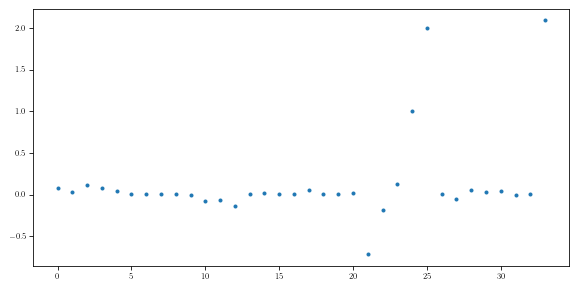

In [74]:
plt.figure(figsize=(8,4))
baselines4 = []
baselines5 = []
metric_labels = []
for c in metrics4.columns:
    m4 = metrics4.loc[baseline4, c]
    m5 = metrics5.loc[baseline5, c]
    if not np.isnan(m5):
        baselines4.append(m4)
        baselines5.append((m5-m4)/m4)
        metric_labels.append(c)

plt.plot(np.arange(len(baselines5)), baselines5, '.')
plt.tight_layout()

In [75]:
np.array(metric_labels)[np.array(baselines5)>0.1]

array(['kn_Maf_Mean_Counts', 'sl_td_all_bands_distance_precision',
       'sl_num_lensed_SNe_Ia_in_specific_galaxy_clusters',
       'sl_std_num_lensed_SNe_Ia_in_specific_galaxy_clusters ',
       'wl_systematics'], dtype='<U68')